In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


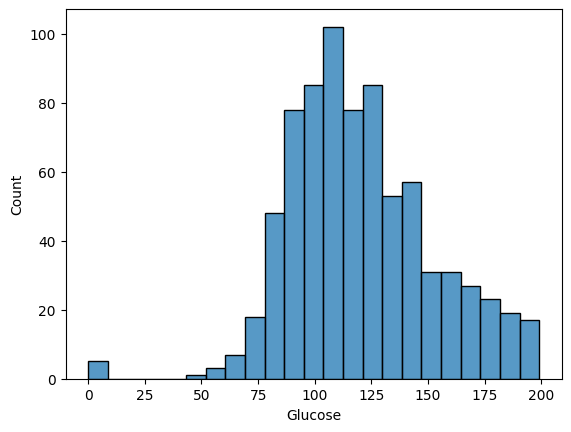

In [4]:
sns.histplot(x=df['Glucose'])
plt.show()

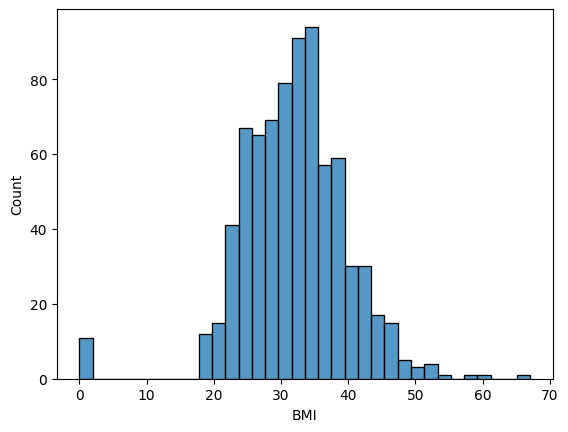

In [5]:
sns.histplot(x=df['BMI'])
plt.show()

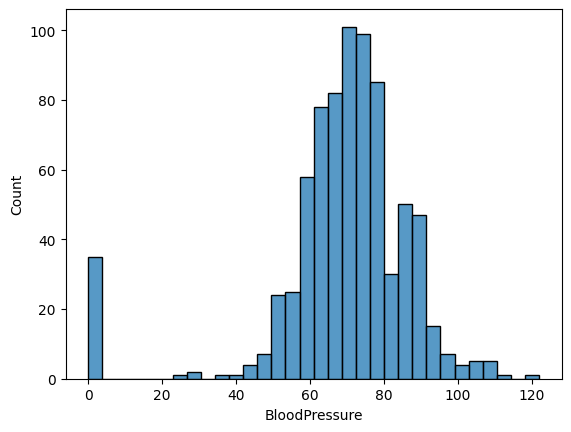

In [6]:
sns.histplot(x=df['BloodPressure'])
plt.show()

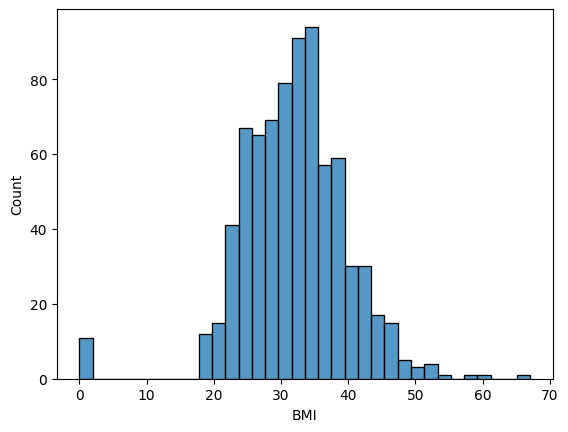

In [7]:
## visualize one after editing 
sns.histplot(x=df['BMI'])
plt.show()

In [8]:
variables=['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2556\3291970953.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(0,df[i].mean(),inplace=True)


In [9]:
x = df.iloc[ : , : -1].values
y = df.iloc[ : , -1].values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [13]:
x_train.shape

(614, 8)

In [14]:
x_test.shape

(154, 8)

In [15]:
log_reg.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred=log_reg.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

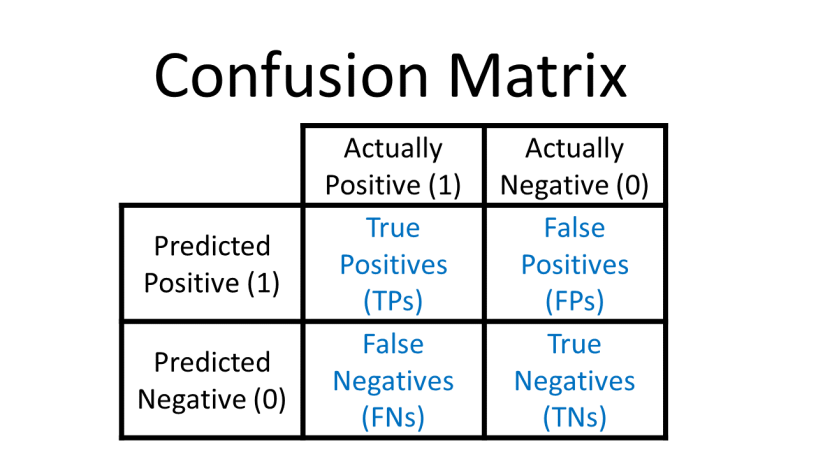

In [18]:
confusion_matrix(y_test,y_pred)

array([[84, 15],
       [19, 36]], dtype=int64)

In [19]:
print('Accuracy score=',accuracy_score(y_test,y_pred))

Accuracy score= 0.7792207792207793


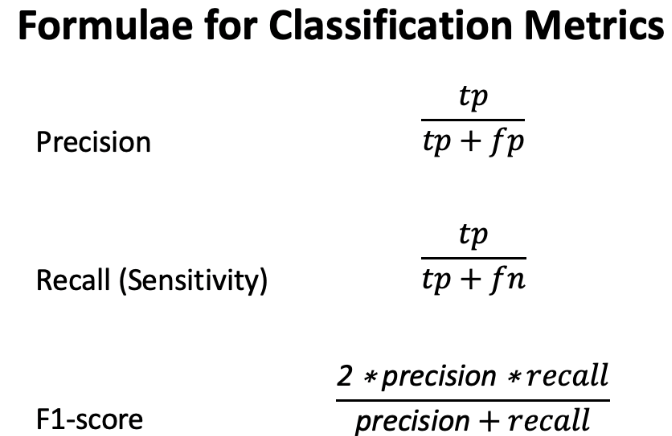

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

